# Модуль 1
-------------------

In [2]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Алгоритмы кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

### 1.1 Парсинг данных

In [3]:
df_tr1 = pd.read_csv('data/3 вар/Data/train_2.csv', delimiter=';', low_memory=False)
#df_tr1.iloc[0:10, 0:5]
df_tr1.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0


In [4]:
df_tr2 = pd.read_csv('data/3 вар/Data/train_1.csv', delimiter=';', low_memory=False)
df_tr2.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...


In [27]:
#df=df_tr1.merge(df_tr2,how='outer')
df=df_tr1.merge(df_tr2, on=['ID'])

In [14]:
df.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,31.10.2021 11:30:06,5462,106,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,22.10.2021 10:46:13,5921,"226,96",KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,05.09.2021 10:02:10,4121,102,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,13.10.2021 21:24:47,5691,21642,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,27.10.2021 19:47:16,5399,4026,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12845075 entries, 0 to 12845074
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   MM_IN_BANK       int64  
 2   MM_W_CARD        int64  
 3   AGE              int64  
 4   GENDER           int64  
 5   EDUCATION_LEVEL  int64  
 6   MARITAL_STATUS   int64  
 7   DEPENDANT_CNT    int64  
 8   INCOME_MAIN_AMT  object 
 9   REG_CODE         float64
 10  PROD_TYPE        int64  
 11  TRANS_DTTM       object 
 12  MCC_CODE         int64  
 13  SUM_TRANS        object 
 14  LOCATION_NAME    object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.5+ GB


Приведём атрибут "INCOME_MAIN_AMT" в числовой формат. Заменяем "," на "." и переводим в вещественный тип

In [28]:
df["INCOME_MAIN_AMT"] = df["INCOME_MAIN_AMT"].astype(str).str.replace(",", ".").astype(float)

In [16]:
df.to_csv('output.csv', index=False, encoding='utf-8-sig')

### 1.2 Формирование структуры набора данных

<AxesSubplot:>

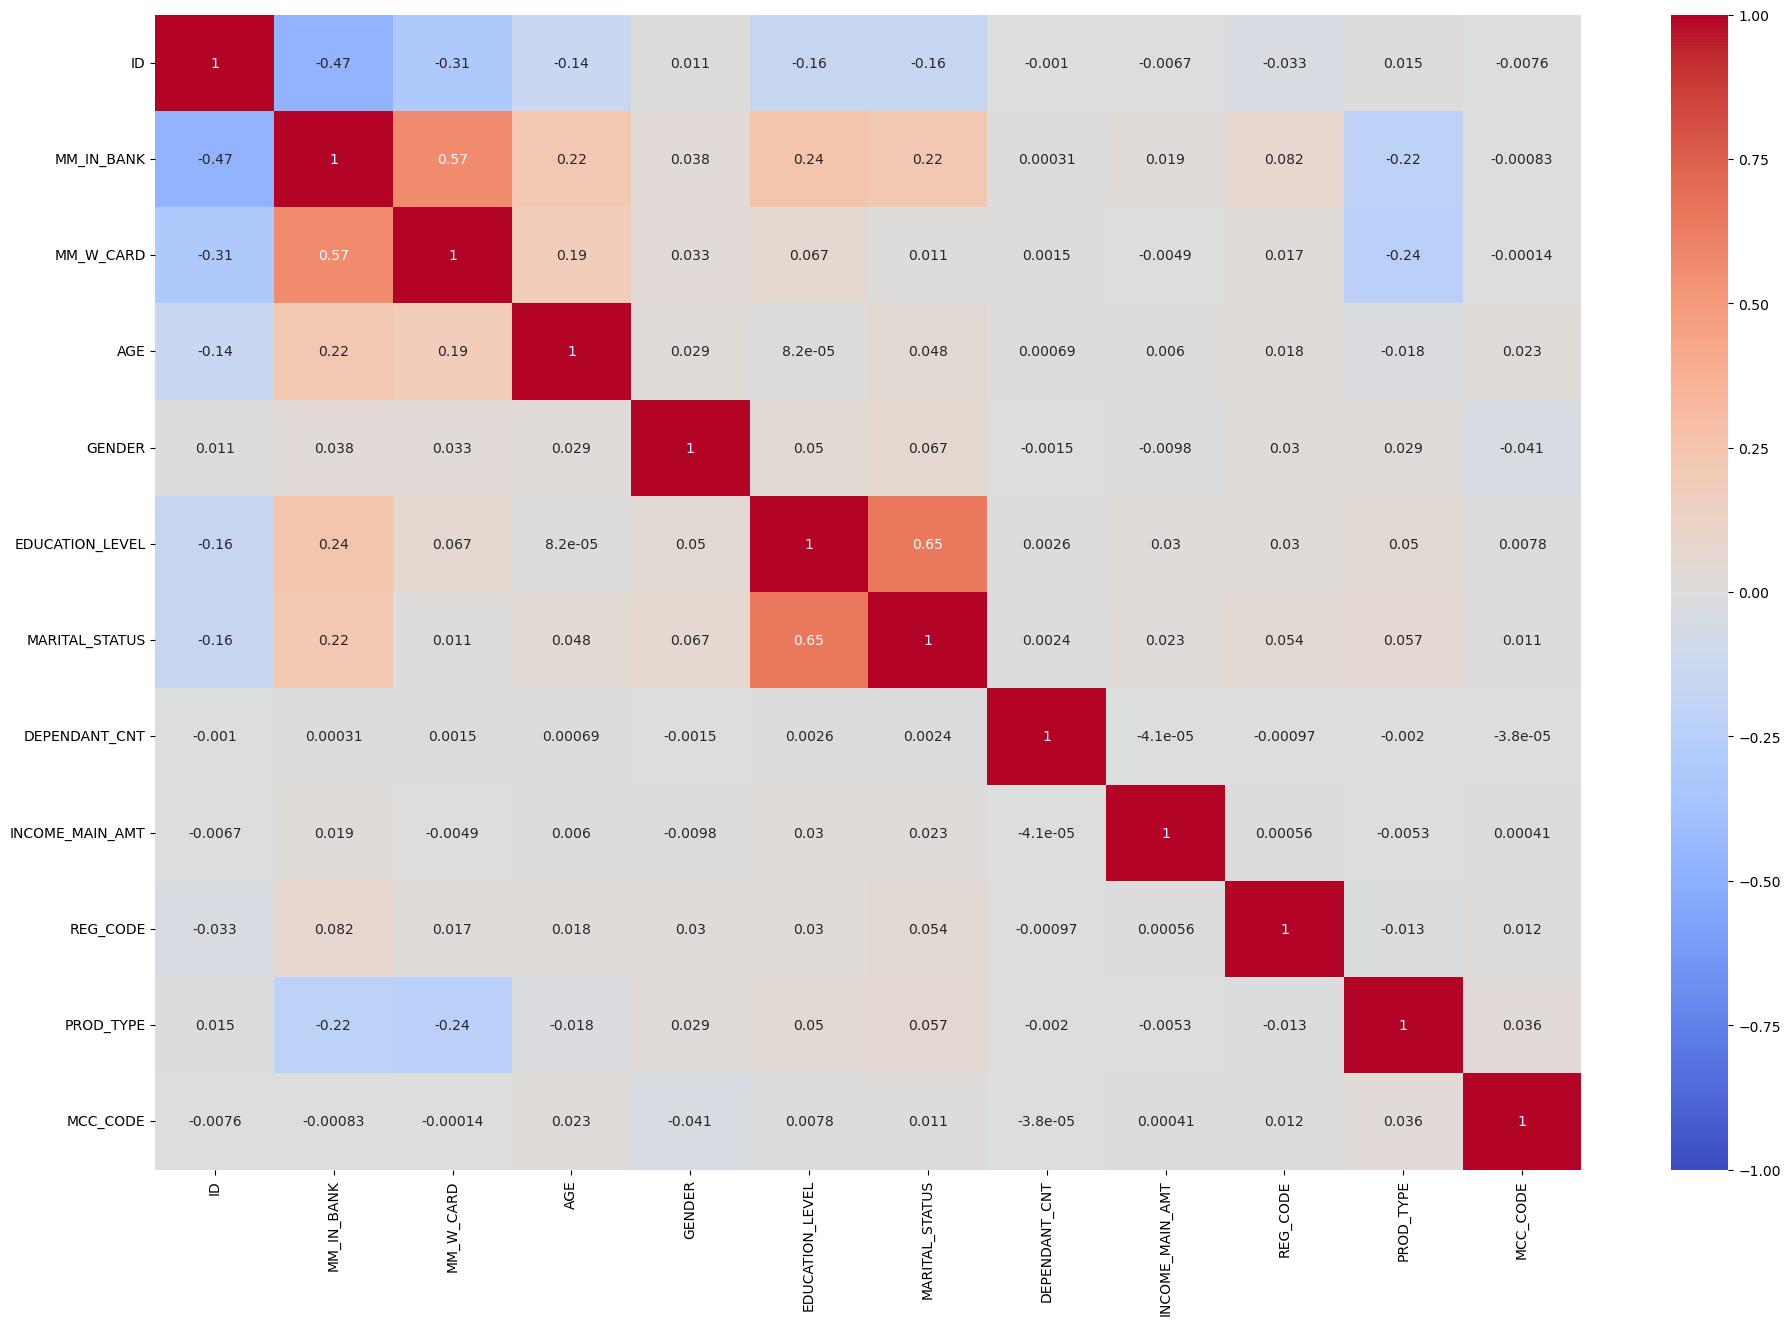

In [17]:
plt.figure(figsize=(23, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:<br>
MATIRIAL_STATUS и EDUCATION_LEVEL<br>
EDUCATION_LEVEL и DEPENDANT_CNT<br>
MM_W_CARD и MM_IN_BANK<br>
ID и MM_IN_BANK<br>

In [29]:
df = df[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE', 'LOCATION_NAME']]
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,LOCATION_NAME
0,35,2,3,3,87000.0,9.0,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,35,2,3,3,87000.0,9.0,KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,35,2,3,3,87000.0,9.0,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,35,2,3,3,87000.0,9.0,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,35,2,3,3,87000.0,9.0,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...
...,...,...,...,...,...,...,...
12845070,45,1,6,3,150000.0,31.0,NaN
12845071,45,1,6,3,150000.0,31.0,NaN
12845072,45,1,6,3,150000.0,31.0,NaN
12845073,45,1,6,3,150000.0,31.0,NaN


Создаем дополнительный атрибут "INCOME_MAIN_AMT_CNY", который переводит из рублей в китайские юани. Это может быть полезно для китайский производителей

In [19]:
df['INCOME_MAIN_AMT_CNY'] = df['INCOME_MAIN_AMT'].apply(lambda x: x * 0.088)

### 1.3 Предварительная обработка данных  

In [20]:
df.isnull().sum()

AGE                          0
GENDER                       0
EDUCATION_LEVEL              0
MARITAL_STATUS               0
INCOME_MAIN_AMT        6450603
REG_CODE                 45655
INCOME_MAIN_AMT_CNY    6450603
dtype: int64

Обрабатываем пропущенные выбросы, удаляя строки с NaN

In [32]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_CNY
0,35,2,3,3,87000.0,9.0,7656.0
1,35,2,3,3,87000.0,9.0,7656.0
2,35,2,3,3,87000.0,9.0,7656.0
3,35,2,3,3,87000.0,9.0,7656.0
4,35,2,3,3,87000.0,9.0,7656.0
...,...,...,...,...,...,...,...
6382896,45,1,6,3,150000.0,31.0,13200.0
6382897,45,1,6,3,150000.0,31.0,13200.0
6382898,45,1,6,3,150000.0,31.0,13200.0
6382899,45,1,6,3,150000.0,31.0,13200.0


Для всех числовых атрибутов строим коробчатые диаграммы для поиска выбросов

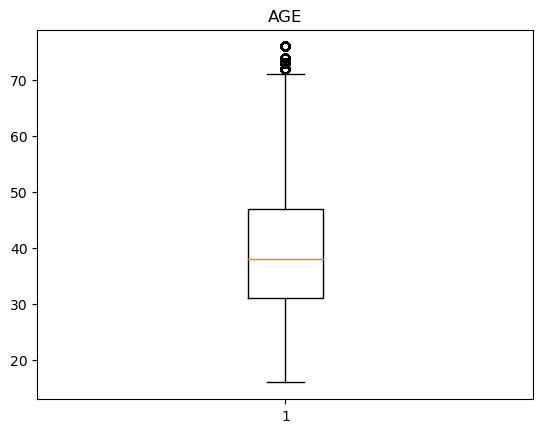

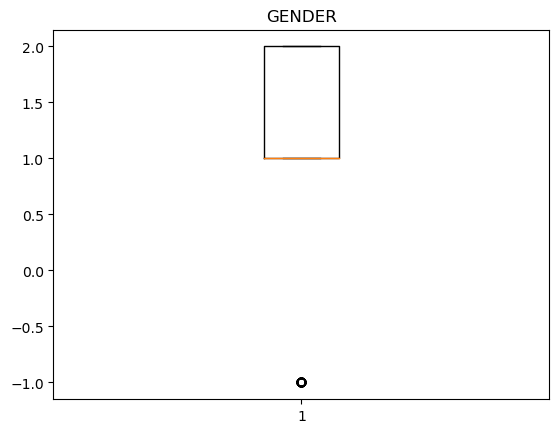

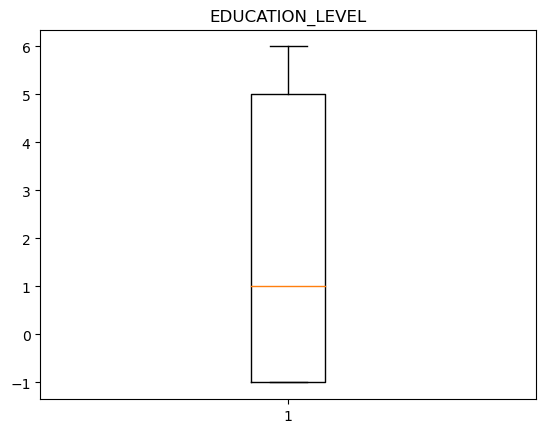

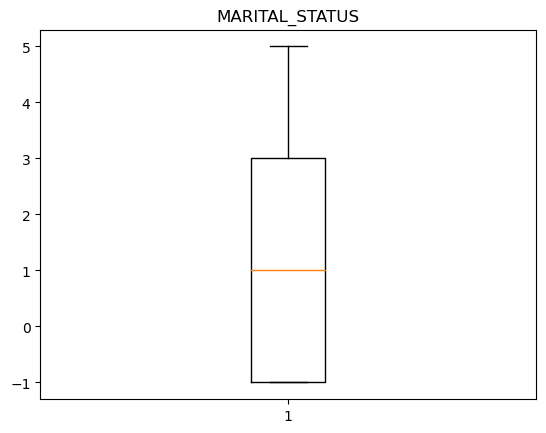

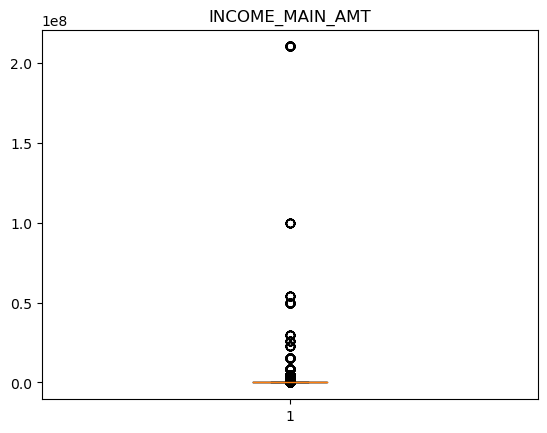

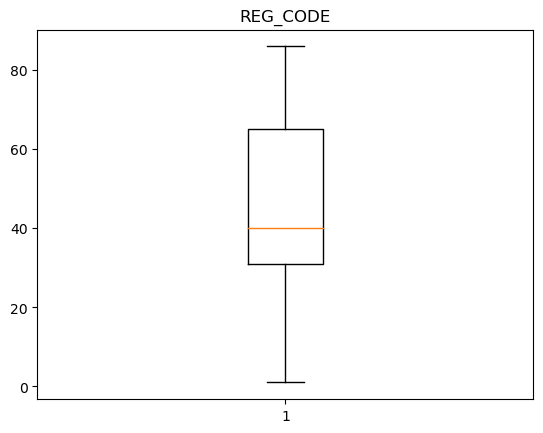

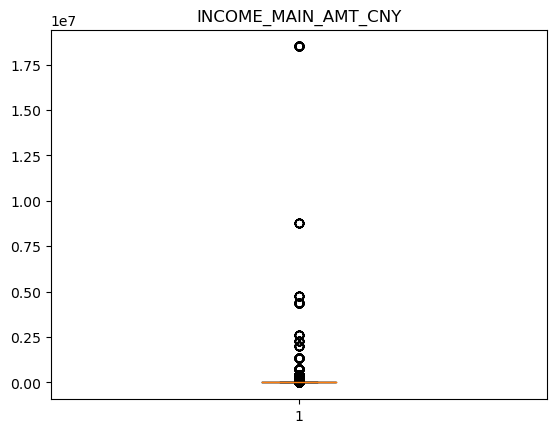

In [23]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


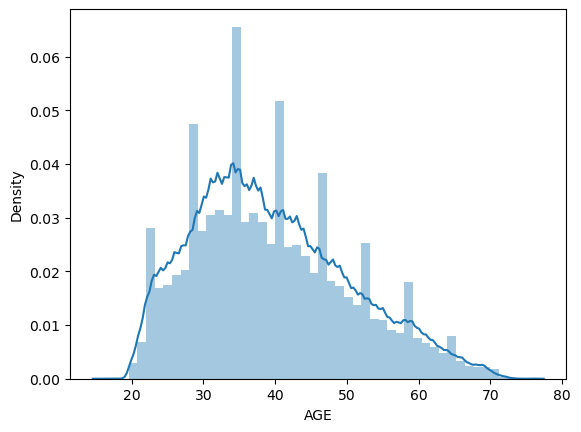

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

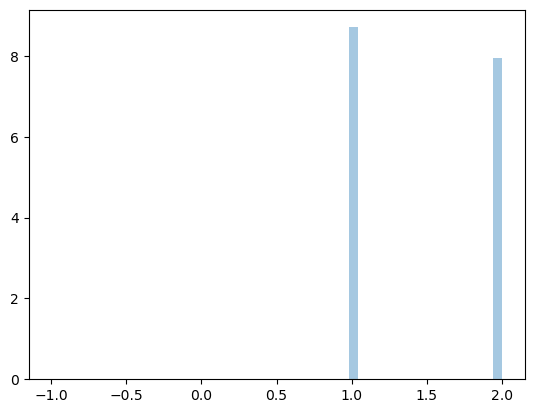

In [24]:
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    sns.distplot(df[col].dropna())
    plt.show()

Если распределение нормальное, то мы применяем метод трех сигм. Но среди наших атрибутов таких нет.
Мы используем правило межквартильного расстояния

In [25]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

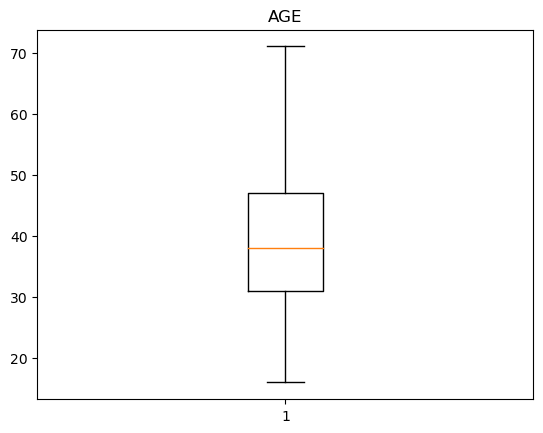

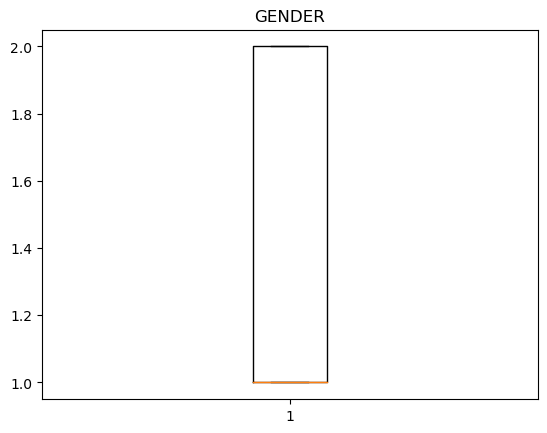

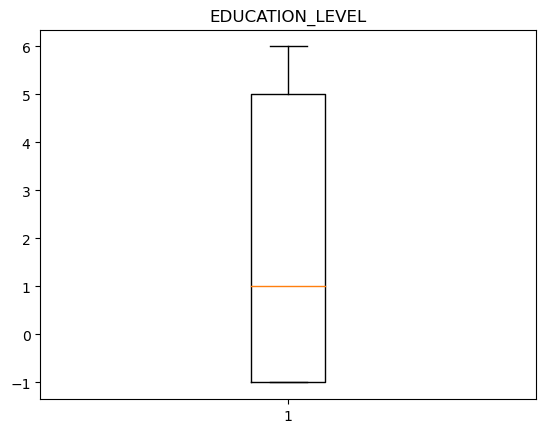

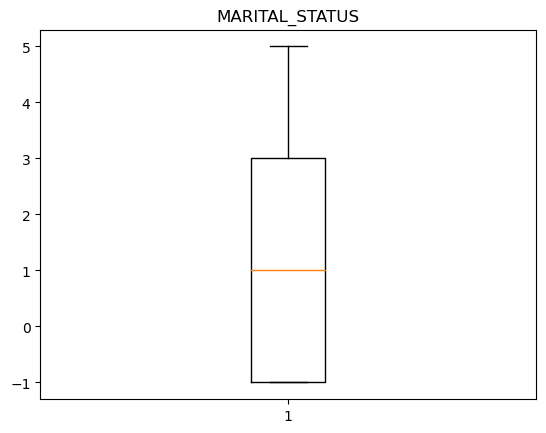

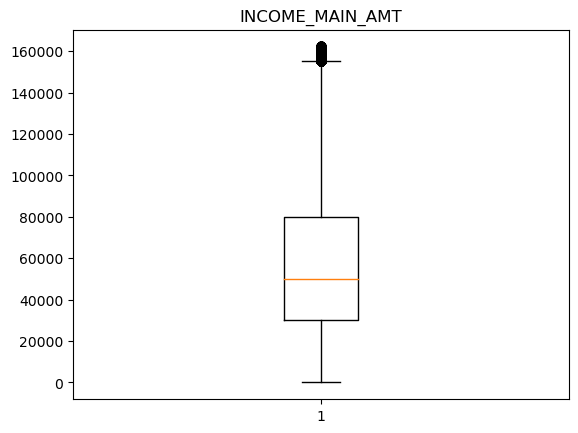

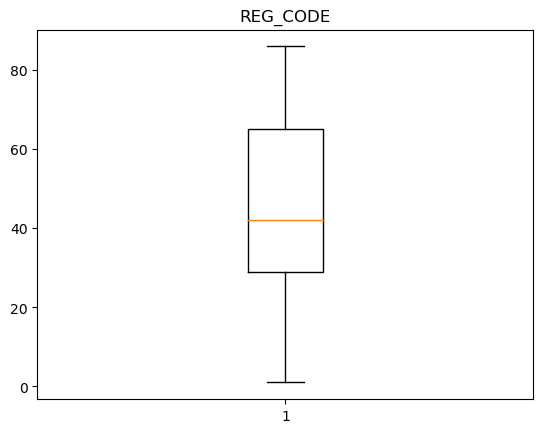

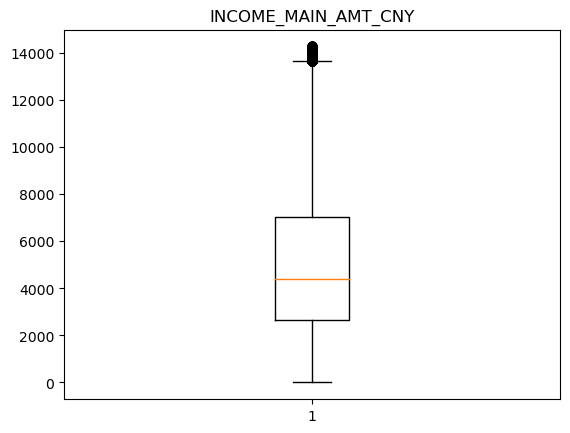

In [26]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

### 1.4 Формирование дополнительных атрибутов

In [30]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,LOCATION_NAME
0,35,2,3,3,87000.0,9.0,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,35,2,3,3,87000.0,9.0,KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,35,2,3,3,87000.0,9.0,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,35,2,3,3,87000.0,9.0,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,35,2,3,3,87000.0,9.0,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...


In [33]:
df2 = df['LOCATION_NAME'].str.split('\\', 4 , expand= True )
df2.columns = ['shop', 'street', 'city', 'index']
df2

,shop,street,city,index
0,BRECEL,9A 8-J VOZDUSHNOJ ARMII STR,VOLGOGRAD,400137 RUSRUS
1,KRASNOE BELOE,14 8-J VOZDUSHNOJ ARMII STR,VOLGOGRAD,400137 RUSRUS
2,YM UBER,82 BLD 12 SADOVNICHESKAYA STR,MOSCOW,115035 RUSRUS
3,WB,6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER,PODOLSK,142181 RUSRUS
4,YM*WILDBERRIES,MONEY.YANDEX.RU,MOSKVA,119021 RUSRUS
...,...,...,...,...
1177134,SPAR 346,1 NOVOYASENEVSKIJ PR-T,GOROD MOSKVA,117574 RUSRUS
1177135,YANDEX.PLUS,"UL.TIMURA FRUNZE, D. 11, KORP. 44, OFIS BTS S",MOSKVA,119021 RUSRUS
1177136,BILIMBI,1 ANDROPOVA PR-T,MOSCOW,115432 RUSRUS
1177137,SUKHOFRUKTY,"CENTRALNAYA, D. 22 CENTRALNAYA, D. 22",PROLETARSKIJ,142271 RUSRUS


In [34]:
df = pd.concat([df, df2], axis=1)
df = df.drop(['shop', 'street', 'LOCATION_NAME'], axis=1) #Можно всё оставить
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,city,index
0,35,2,3,3,87000.0,9.0,VOLGOGRAD,400137 RUSRUS
1,35,2,3,3,87000.0,9.0,VOLGOGRAD,400137 RUSRUS
2,35,2,3,3,87000.0,9.0,MOSCOW,115035 RUSRUS
3,35,2,3,3,87000.0,9.0,PODOLSK,142181 RUSRUS
4,35,2,3,3,87000.0,9.0,MOSKVA,119021 RUSRUS
...,...,...,...,...,...,...,...,...
1177134,45,1,6,3,150000.0,31.0,GOROD MOSKVA,117574 RUSRUS
1177135,45,1,6,3,150000.0,31.0,MOSKVA,119021 RUSRUS
1177136,45,1,6,3,150000.0,31.0,MOSCOW,115432 RUSRUS
1177137,45,1,6,3,150000.0,31.0,PROLETARSKIJ,142271 RUSRUS


### 1.5 Кластеризация

Подготовка данных
Отдельно возьму атрибуты, которые буду визуализировать для сегментации пользователей

In [23]:
#Помещу их в переменную X
X = df[["AGE", "GENDER", "EDUCATION_LEVEL"]]

Я выбрал эти атрибуты, так как в зависимости от региона и категории товара (продовца) стоимость покупок будет разной и я считаю, что этих атрибутов будет достаточно что бы модель не имела проблем с переобучением и недообучением

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.


Приводим данные в одному диапазону, чтобы качество кластеризации было получше

In [24]:
#обьявляю MinMaxScaler (Экземпляр класса)
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [25]:
X

array([[0.34545455, 1.        , 0.57142857],
       [0.32727273, 1.        , 0.57142857],
       [0.34545455, 0.        , 0.28571429],
       ...,
       [0.38181818, 1.        , 0.        ],
       [0.50909091, 1.        , 0.28571429],
       [0.52727273, 0.        , 1.        ]])

#### PCA
Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

Понижение размерности. Уменьшает размерность без потери данных

In [26]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

In [27]:
X

array([[-0.49219653,  0.23172796],
       [-0.49193264,  0.23049789],
       [ 0.52646395,  0.02405502],
       ...,
       [-0.44944836, -0.33425082],
       [-0.47293354, -0.04142087],
       [ 0.46973014,  0.74690436]])

#### Функция визуализации
Отдельно вынесу функцию для визуализации

In [55]:
#Функция для визуализации распределения 
def viz(prediction):
    #Размер фигуры
    plt.figure(figsize=(5, 5))
    #plt.subplot(224)
    #Выводить изображение буду при помощи scatter
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    #Вывод изображения
    plt.show()

#### Выбор алгоритмов (KMeans, MiniBatchKMeans, GaussianMixtures) (Birch)
Я решил взять алгоритмы KMeans, MiniBatchKMeans и GaussianMixtures, так как они идеально подходят для такого набора данных, они сочетают в себе скорость работы, а так же качество кластеризации

#### KMeans

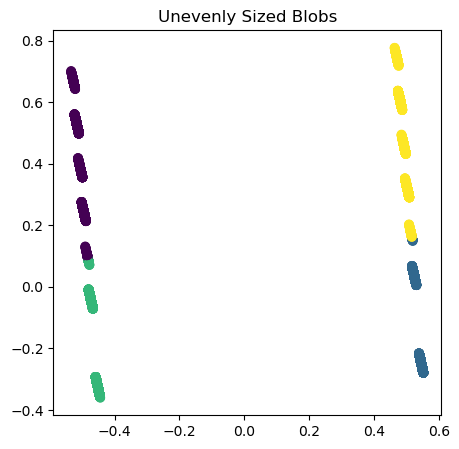

In [51]:
#Настройка параметров
#Создали экземпляр класса, определили 4 кластера, обучили на наших данных
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds

#Применяю функцию описаную выше
viz(df["KMCLUSTS"])

#### MiniBatchKMeans

In [23]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
#Обучили и сделали предсказание
df["KBCLUSTS"] = kbmeans.fit_predict(X)

viz(df["KBCLUSTS"])

NameError: name 'X' is not defined

#### GaussianMixture

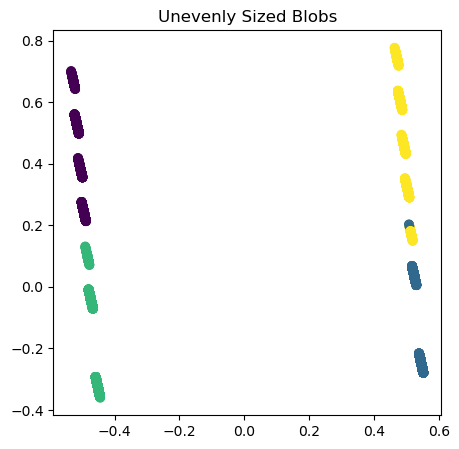

In [58]:
#Настройка параметров
gm = GaussianMixture(n_components=4, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
df["GMCLUSTS"] = gm

viz(df["GMCLUSTS"])

#### Результаты метрик

Calinski-Harabasz index
Представляет собой отношение суммы дисперсии между кластерами и межкластерной дисперсии для всех кластеров. Чем выше значение, тем лучше произведена кластеризация.

Davies-Bouldin index 
Показывает среднее «сходство» кластеров: расстояние между ними сравнивается с их размером. Чем меньше значение, тем лучше произведено разделение на кластеры.

In [24]:
from sklearn.metrics import silhouette_score

##### Kmeans 

In [59]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KMCLUSTS"]))
#Силуэт
print(silhouette_score(X, df["KMCLUSTS"]))

729267.609999599
0.30910128140579984


##### MiniBatchKmeans


In [60]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KBCLUSTS"]))

729266.9754418622
0.3090519600778715


##### GussianMixture

In [61]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["GMCLUSTS"]))

728364.2083705545
0.30880148921481143


#### Решение
По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

В наш датафрейм были добавлены кластеры и тк GussianMixture отработал лучше, MiniBatchKmeans и Kmeans удаляем

In [ ]:
# Удаление ненужных атрибутов с кластерами
df.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

### 1.6 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [ ]:
# df.to_csv('output.csv', index=False, encoding='utf-8-sig') 